# Exploratory Data Analysis

The main objectives for this notebook are:
- Perform univariate analysis
- Investigate the relationships between features
- Highlight insights that can inform the stakeholders' decisions
- Go through the next steps that will be used in feature engineering and machine learning

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('../data/Iranian_churn_cleaned.csv')
df

,call_fails,complained,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,tariff_plan,status,age,cust_value,churn
0,8,False,38,0,4370,71,5,17,Prepaid,Active,30,197.640,False
1,0,False,39,0,318,5,7,4,Prepaid,Inactive,25,46.035,False
2,10,False,37,0,2453,60,359,24,Prepaid,Active,30,1536.520,False
3,10,False,38,0,4198,66,1,35,Prepaid,Active,15,240.020,False
4,3,False,38,0,2393,58,2,33,Prepaid,Active,15,145.805,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,False,19,2,6697,147,92,44,Contractual,Active,25,721.980,False
3146,17,False,17,1,9237,177,80,42,Prepaid,Active,55,261.210,False
3147,13,False,18,4,3157,51,38,21,Prepaid,Active,30,280.320,False
3148,7,False,11,2,4695,46,222,12,Prepaid,Active,30,1077.640,False


Additional variable information:
- call_fails: number of call failures
- complained: bool (0: No complaint, 1: complaint)
- sub_length: total months of subscription
- charge_amt: Ordinal attribute (0: lowest amount, 9: highest amount)
- seconds_used: total seconds of calls
- usage_freq: total number of calls
- sms_freq: total number of text messages
- unique_contacts_called: total number of distinct phone calls
- tariff_plan: categorical (1: Pay as you go, 2: contractual)
- status: categorical (1: active, 2: non-active)
- churn: bool (1: churn, 0: non-churn) - Class label
- cust_value: The calculated value of customer

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   call_fails              3150 non-null   int64  
 1   complained              3150 non-null   bool   
 2   sub_length              3150 non-null   int64  
 3   charge_amt              3150 non-null   int64  
 4   seconds_used            3150 non-null   int64  
 5   usage_freq              3150 non-null   int64  
 6   sms_freq                3150 non-null   int64  
 7   unique_contacts_called  3150 non-null   int64  
 8   tariff_plan             3150 non-null   object 
 9   status                  3150 non-null   object 
 10  age                     3150 non-null   int64  
 11  cust_value              3150 non-null   float64
 12  churn                   3150 non-null   bool   
dtypes: bool(2), float64(1), int64(8), object(2)
memory usage: 277.0+ KB


In [5]:
df.describe()

,call_fails,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,age,cust_value
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,30.998413,470.972916
std,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,8.831095,517.015433
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,25.000000,113.801250
50%,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,30.000000,228.480000
75%,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,30.000000,788.388750
max,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,55.000000,2165.280000


In [6]:
# Predefine figsize
figsize1_1 = (8, 4)
figsize1_2 = (16, 5)

# Univariate analysis

In [25]:
def draw_mean_median(dataframe, axes, i):
    """
    Function for drawing a mean and median line.
    Arg: df['column']
    """
    axes[(i//3), (i%3)].axvline(x=np.mean(dataframe),
            color='red',
            label='mean')
    axes[(i//3), (i%3)].axvline(x=np.median(dataframe),
            color='green',
            ls='--',
            label='median')

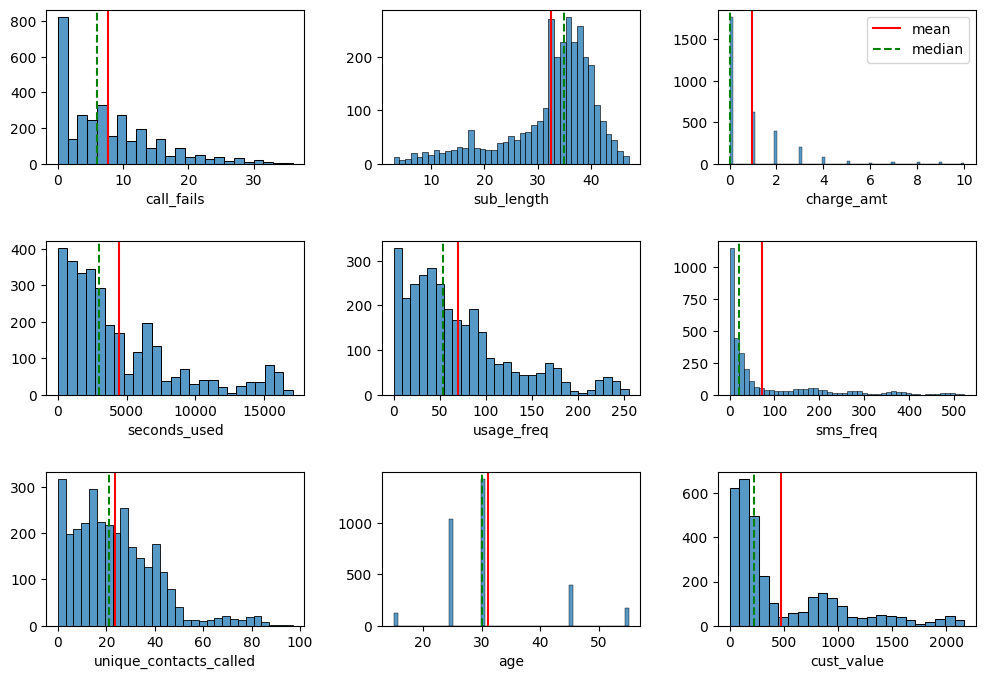

In [65]:
num_list = list(['call_fails', 'sub_length', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value'])

fig1, axes = plt.subplots(3, 3, figsize=(12,8))

for i, num_col in enumerate(num_list):
    sns.histplot(x=df[num_col], ax=axes[(i//3), (i%3)])
    draw_mean_median(df[num_col], axes, i)
    axes[(i//3), (i%3)].set_ylabel('')

fig1.subplots_adjust(wspace=0.3, hspace=0.5)
axes[0,2].legend(loc='upper right')

**Observations**
- The distributions for call fails, seconds of use, usage frequency, sms frequency, unique contacts called, and customer value are all positively-skewed. Only the distribution for subscription length has a negative skew. 
- Charge amount and age are the only discrete numerical variables.
- A large chunk of the people have called 0-40 unique contacts.

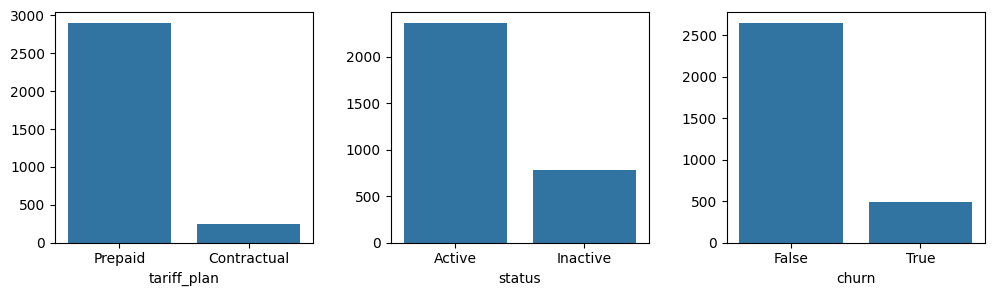

In [52]:
cat_list = list(['tariff_plan', 'status', 'churn'])

fig1, axes = plt.subplots(1, 3, figsize=(12,3))

for i, cat_col in enumerate(cat_list):
    sns.countplot(x=df[cat_col], data=df, ax=axes[i])
    axes[i].set_ylabel('')

fig1.subplots_adjust(wspace=0.3)

# Bivariate Analysis

<Axes: xlabel='cust_value', ylabel='Count'>

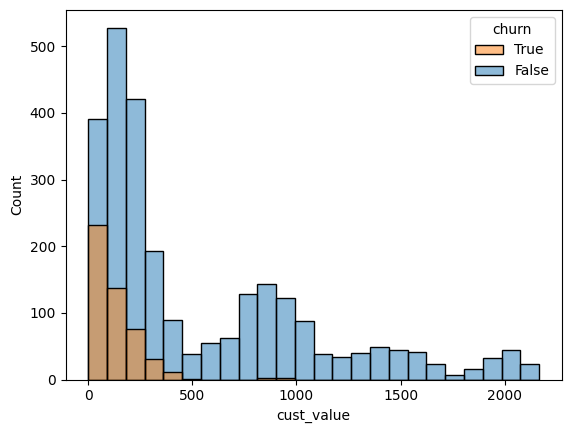

In [172]:
sns.histplot(data=df, x='cust_value', hue='churn', hue_order=[True, False], palette={True: '#ff7f0e', False: '#1f77b4'})

In [187]:
# Show vs cust value and vs churn

def two_plot_cont(df, col_name):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=figsize1_2)
    sns.scatterplot(data=df, x=col_name, y='cust_value', alpha=0.2, ax=ax0)
    sns.histplot(data=df, x=col_name, hue='churn', hue_order=[True, False], ax=ax1, palette={True: '#ff7f0e', False: '#1f77b4'})

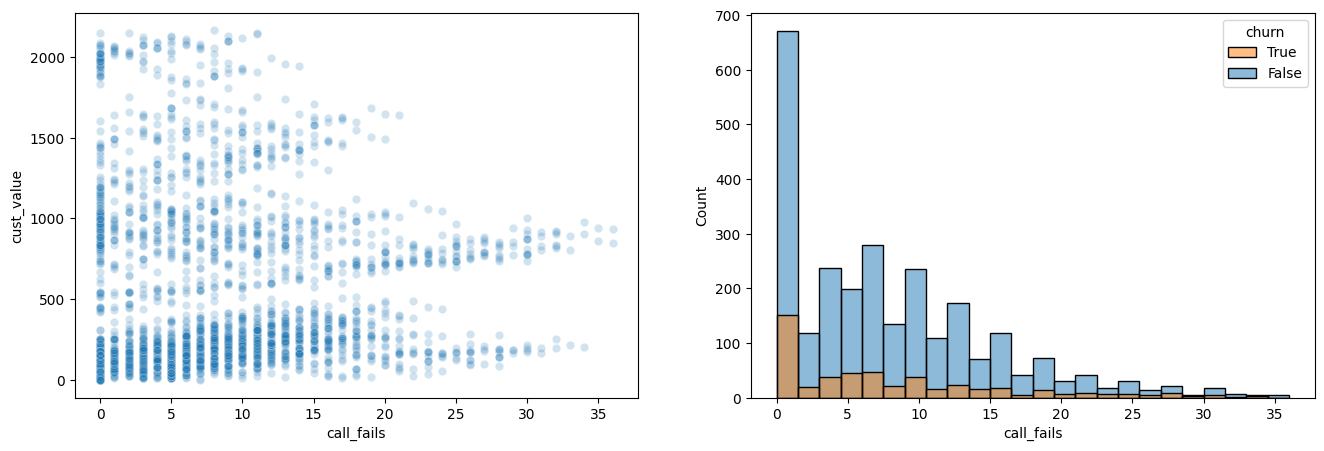

In [188]:
two_plot_cont(df, 'call_fails')

In [182]:
def two_plot_cat(df, col_name):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=figsize1_2)
    sns.violinplot(data=df, x=col_name, y='cust_value', hue='churn', ax=ax0, split = True, inner=None)
    sns.countplot(x=col_name, hue='churn', data=df)

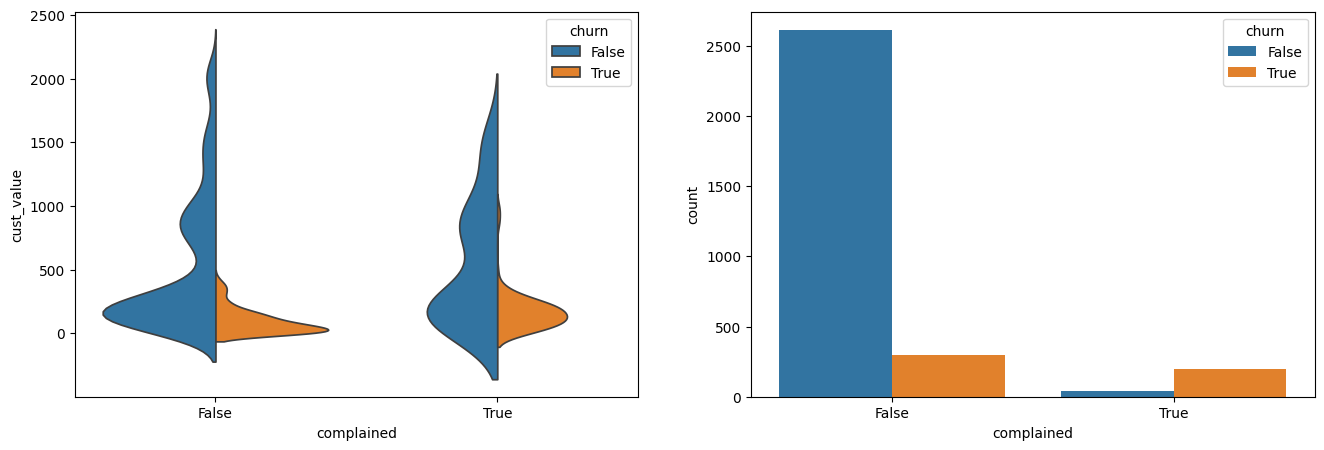

In [183]:
two_plot_cat(df, 'complained')

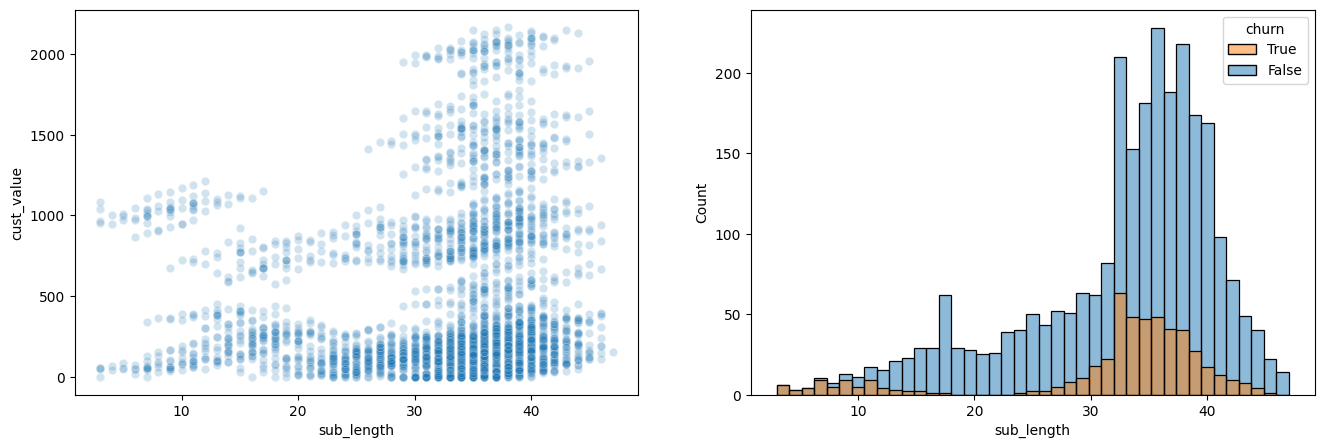

In [162]:
two_plot_cont(df, 'sub_length')

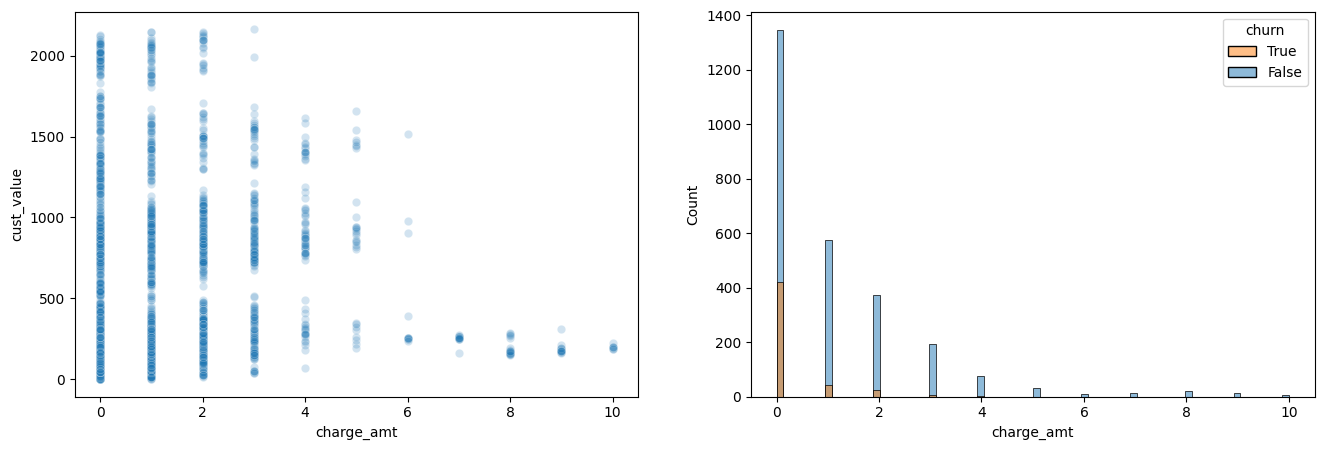

In [164]:
two_plot_cont(df, 'charge_amt')

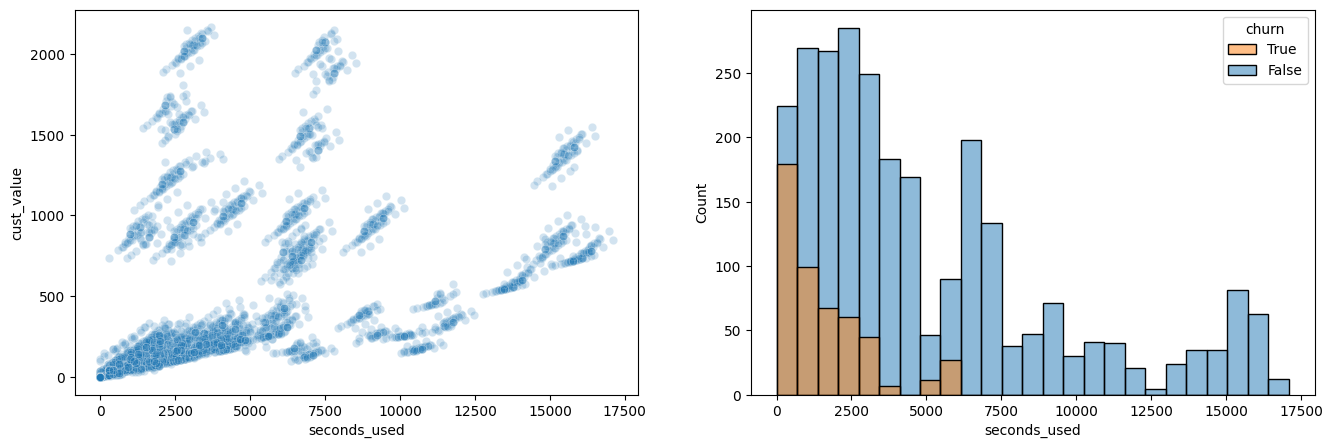

In [165]:
two_plot_cont(df, 'seconds_used')

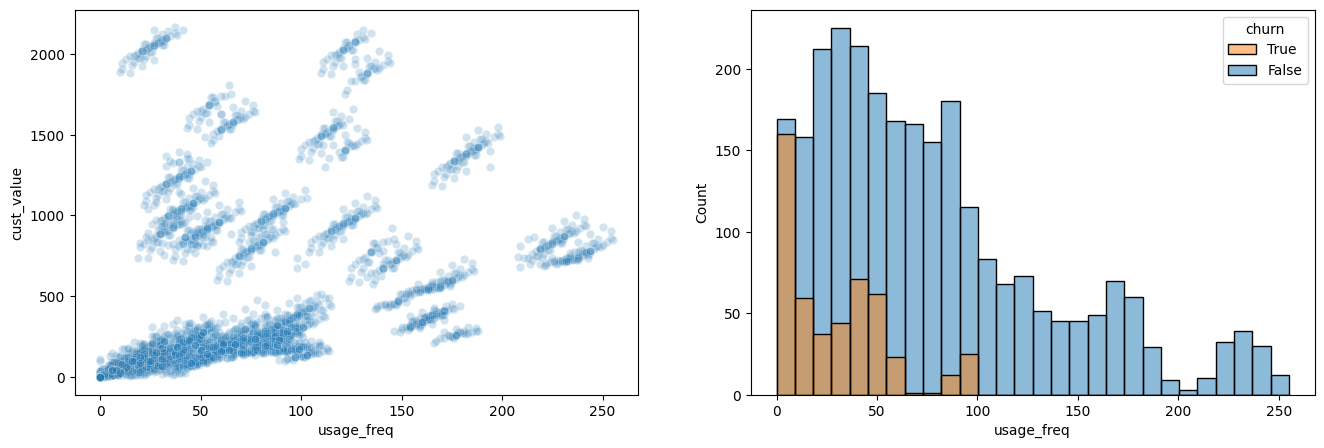

In [166]:
two_plot_cont(df, 'usage_freq')

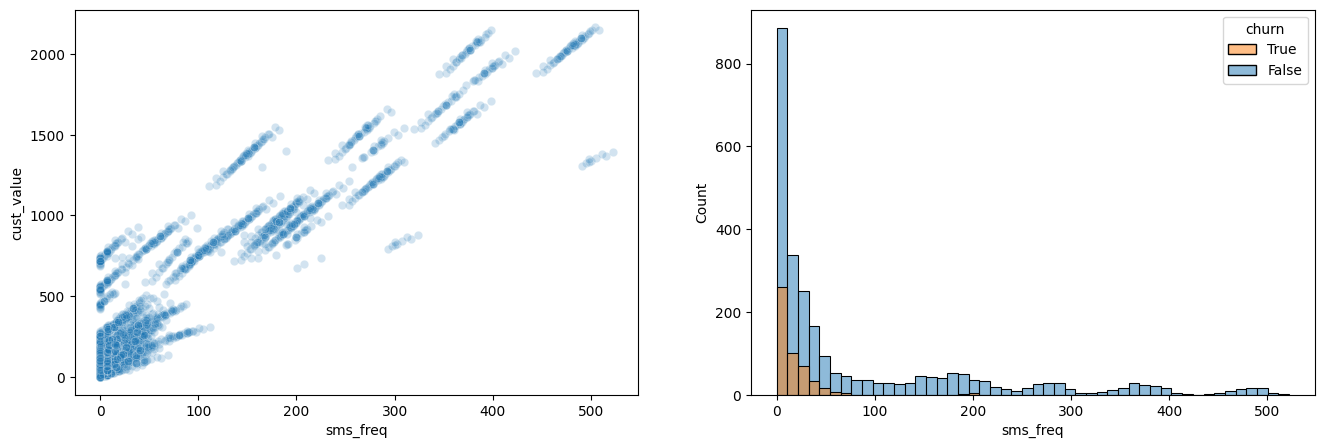

In [167]:
two_plot_cont(df, 'sms_freq')

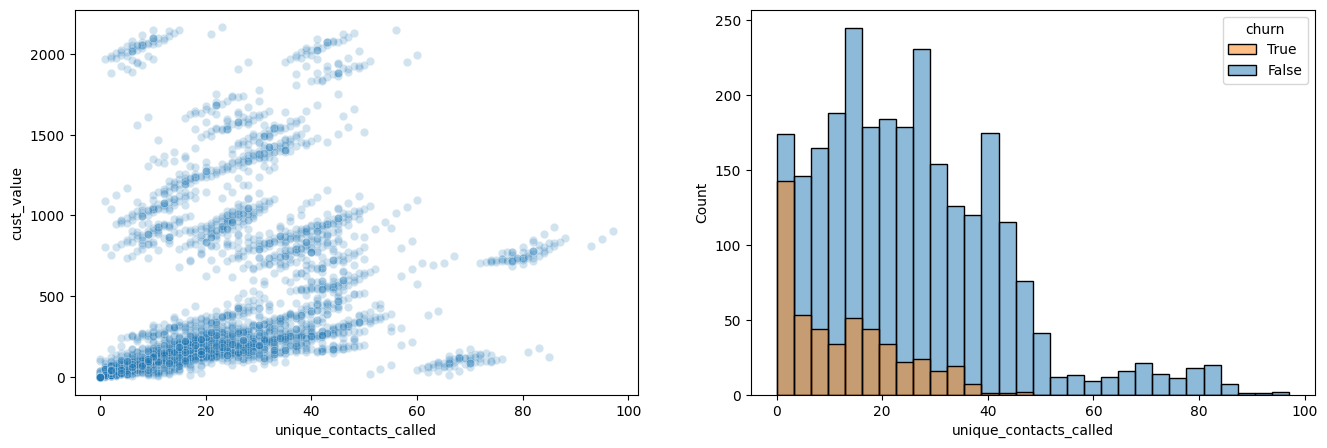

In [168]:
two_plot_cont(df, 'unique_contacts_called')

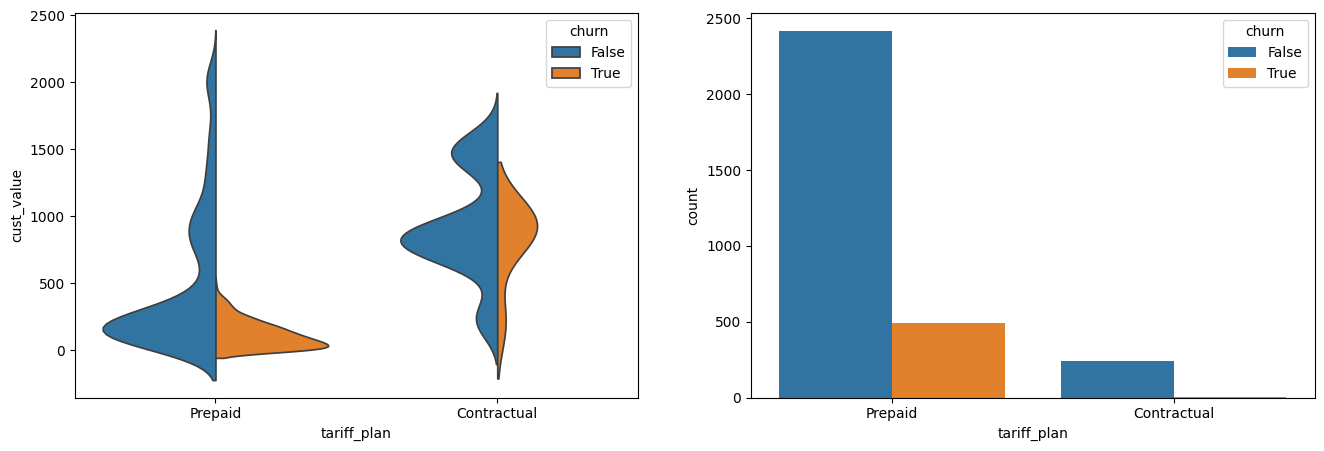

In [197]:
two_plot_cat(df, 'tariff_plan')

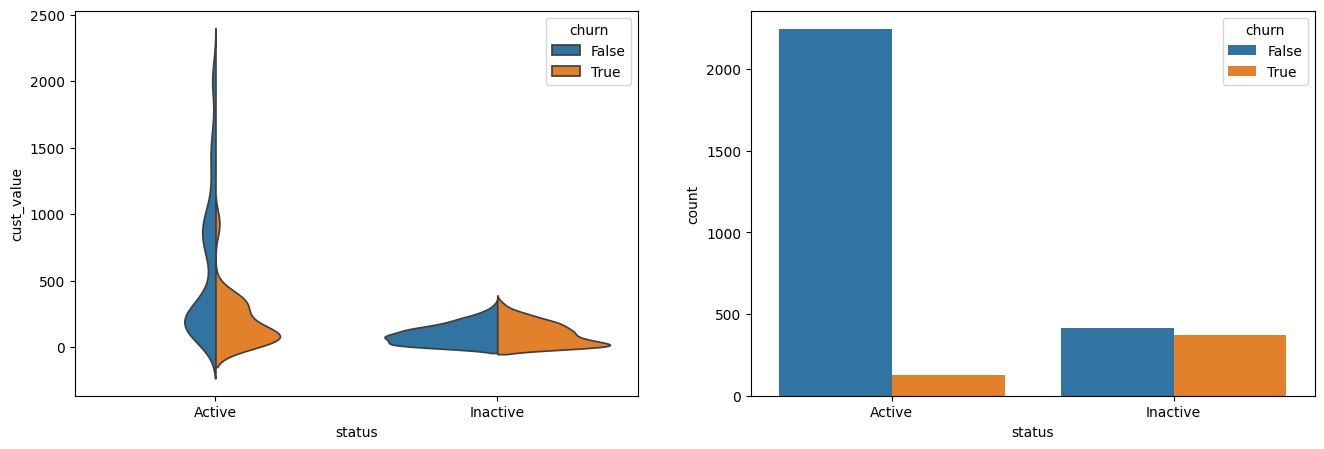

In [198]:
two_plot_cat(df, 'status')

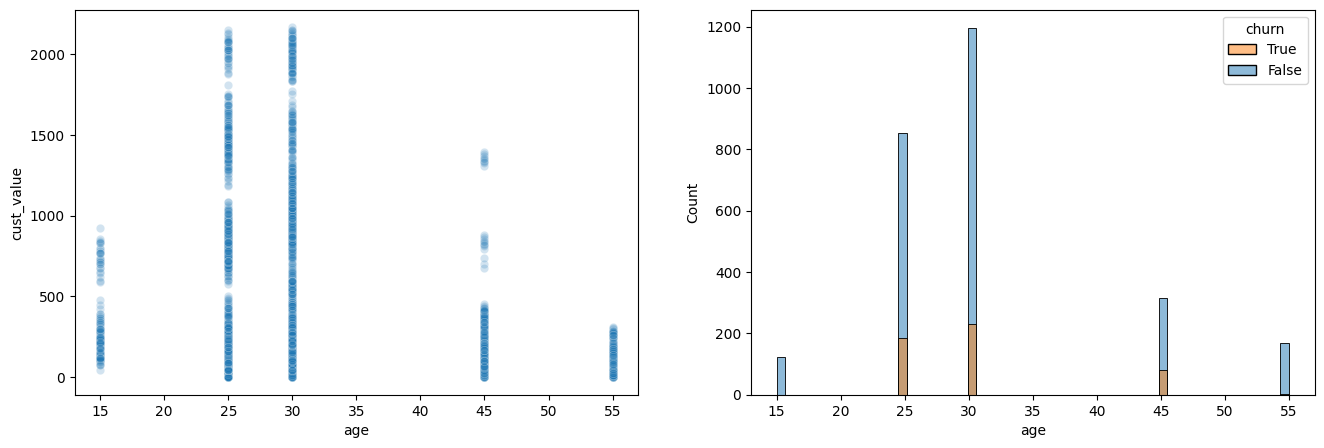

In [171]:
two_plot_cont(df, 'age')

# Multivariate Analysis

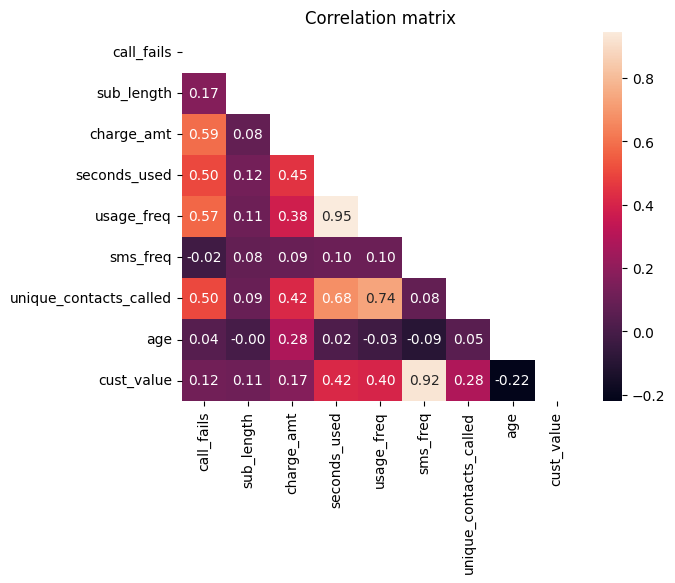

In [199]:
num_list = list(['call_fails', 'sub_length', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value'])
correl_data = df[num_list]
correl_matrix = correl_data.corr()

fig3, ax0 = plt.subplots()  

matrix = np.triu(correl_matrix)

# using the upper triangle matrix as mask 
sns.heatmap(correl_matrix, annot=True, mask=matrix, fmt='.2f',)

plt.title('Correlation matrix')
plt.show()